# Bitcoin dataset analysis

## Data Cleaning
---

#### Loading dataset from 2017

In [344]:
import pandas as pd
import pandas_bokeh

# set pandas_bokeh to output inline
pandas_bokeh.output_notebook()

bitcoin_2017 = pd.read_csv("datasets/BTC-2017min.csv")
bitcoin_2017.head()

Loading BokehJS ...

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1514764740,2017-12-31 23:59:00,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549
1,1514764680,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2,1514764620,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
3,1514764560,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
4,1514764500,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130


#### About each Column:

- <strong>Unix Timestamp</strong> - This is the unix timestamp or also known as "Epoch Time". Use this to convert to your local timezone
- <strong>Date</strong> - This timestamp is UTC Timezone
- <strong>Symbol</strong> - The symbol for which the timeseries data refers
- <strong>Open</strong> - This is the opening price of the time period
- <strong>High</strong> - This is the highest price of the time period
- <strong>Low</strong> - This is the lowest price of the time period
- <strong>Close</strong> - This is the closing price of the time period
- <strong>Volume BTC</strong> - This is the volume that was transacted 
- <strong>Volume USD</strong> - This is the volume in the base/converted

#### Remove unecessary columns

In [345]:
bitcoin_2017 = bitcoin_2017.drop(['unix'], axis = 1)
bitcoin_2017 = bitcoin_2017.drop(['symbol'], axis = 1)

#### Index by date

In [346]:
bitcoin_2017['date'] = pd.to_datetime(bitcoin_2017['date'])
bitcoin_2017 = bitcoin_2017.set_index('date')

#### Reverse row order (From oldest to newest)

In [347]:
bitcoin_2017 = bitcoin_2017.iloc[::-1]
bitcoin_2017.tail()

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2017-12-31 23:55:00,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130
2017-12-31 23:56:00,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
2017-12-31 23:57:00,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
2017-12-31 23:58:00,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2017-12-31 23:59:00,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549


#### Change column names and order

In [348]:
bitcoin_2017.rename(columns = {'Volume BTC': 'bitcoin', 'Volume USD': 'euro'}, inplace = True)
bitcoin_2017.tail()

,open,high,low,close,bitcoin,euro
date,,,,,,
2017-12-31 23:55:00,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130
2017-12-31 23:56:00,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
2017-12-31 23:57:00,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
2017-12-31 23:58:00,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2017-12-31 23:59:00,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549


#### Convert USD columns to Euro (1 USD = 0.924428 EUR)

In [349]:
bitcoin_2017['open'] = bitcoin_2017['open'] * 0.924428
bitcoin_2017['close'] = bitcoin_2017['close'] * 0.924428
bitcoin_2017['high'] = bitcoin_2017['high'] * 0.924428
bitcoin_2017['low'] = bitcoin_2017['low'] * 0.924428
bitcoin_2017['euro'] = bitcoin_2017['euro'] * 0.924428

#### Describe dataframe

In [350]:
bitcoin_2017.describe()

,open,high,low,close,bitcoin,euro
count,525599.000000,525599.000000,525599.000000,525599.000000,525599.000000,5.255990e+05
mean,3650.019259,3653.531911,3645.714669,3649.955408,8.939796,3.830313e+04
std,3639.249293,3644.448907,3632.622971,3639.191976,20.779163,1.084940e+05
min,695.169856,695.918643,694.559734,695.206833,0.000000,0.000000e+00
25%,1106.956309,1107.446255,1106.577293,1106.965553,0.348564,6.625986e+02
50%,2373.413424,2375.197570,2371.481370,2373.163829,2.575998,6.701258e+03
75%,4192.803282,4196.353085,4188.611001,4192.280980,9.416233,3.045436e+04
max,18179.579185,18179.801048,18164.973223,18179.569941,1616.060001,4.757050e+06


#### Info dataframe

In [351]:
bitcoin_2017.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525599 entries, 2017-01-01 00:01:00 to 2017-12-31 23:59:00
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   open     525599 non-null  float64
 1   high     525599 non-null  float64
 2   low      525599 non-null  float64
 3   close    525599 non-null  float64
 4   bitcoin  525599 non-null  float64
 5   euro     525599 non-null  float64
dtypes: float64(6)
memory usage: 28.1 MB


## Resampling
---

#### Daily resample

In [352]:
# Get the max value and compare it from now on
max_daily_bitcoin_2017 = bitcoin_2017['high'].resample('D').max()
max_daily_bitcoin_2017

date
2017-01-01      929.050140
2017-01-02      954.009696
2017-01-03      960.480692
2017-01-04     1053.746233
2017-01-05     1050.815796
                  ...     
2017-12-27    15235.054143
2017-12-28    14304.774513
2017-12-29    13969.031508
2017-12-30    13370.261004
2017-12-31    13215.678154
Freq: D, Name: high, Length: 365, dtype: float64

#### Weekly resample

In [353]:
max_weekly_bitcoin_2017 = bitcoin_2017['high'].resample('W').max()
max_weekly_bitcoin_2017

date
2017-01-01      929.050140
2017-01-08     1053.746233
2017-01-15      848.994675
2017-01-22      866.873113
2017-01-29      857.471680
2017-02-05      965.315450
2017-02-12      993.473527
2017-02-19      988.204288
2017-02-26     1127.802160
2017-03-05     1199.907544
2017-03-12     1247.977800
2017-03-19     1164.779280
2017-03-26     1033.418061
2017-04-02     1016.870800
2017-04-09     1124.908700
2017-04-16     1136.122012
2017-04-23     1157.679673
2017-04-30     1253.524368
2017-05-07     1500.355888
2017-05-14     1749.017776
2017-05-21     1907.196651
2017-05-28     2551.513723
2017-06-04     2389.036258
2017-06-11     2743.203113
2017-06-18     2754.795440
2017-06-25     2578.229692
2017-07-02     2398.687286
2017-07-09     2439.999973
2017-07-16     2336.843053
2017-07-23     2715.969464
2017-07-30     2611.509100
2017-08-06     3087.275214
2017-08-13     3873.353320
2017-08-20     4141.437440
2017-08-27     4113.686111
2017-09-03     4603.558997
2017-09-10     4326.295

#### Monthly resample

In [354]:
max_monthly_bitcoin_2017 = bitcoin_2017['high'].resample('M').max()
max_monthly_bitcoin_2017


date
2017-01-31     1053.746233
2017-02-28     1127.802160
2017-03-31     1247.977800
2017-04-30     1253.524368
2017-05-31     2551.513723
2017-06-30     2754.795440
2017-07-31     2715.969464
2017-08-31     4405.093550
2017-09-30     4603.558997
2017-10-31     5962.357226
2017-11-30    10533.857060
2017-12-31    18179.801048
Freq: M, Name: high, dtype: float64

## Data visualization
---

In [355]:
max_daily_bitcoin_2017.plot_bokeh(figsize=(1200,600), legend="top_left", ylabel="Daily max", xlabel="Date", title="Daily max year overview bitcoin 2017")

Figure(id='14292', ...)

In [356]:
max_weekly_bitcoin_2017.plot_bokeh(figsize=(1200,600), legend="top_left", ylabel="Weekly max", xlabel="Date", title="Weekly max year overview bitcoin 2017")

Figure(id='14489', ...)

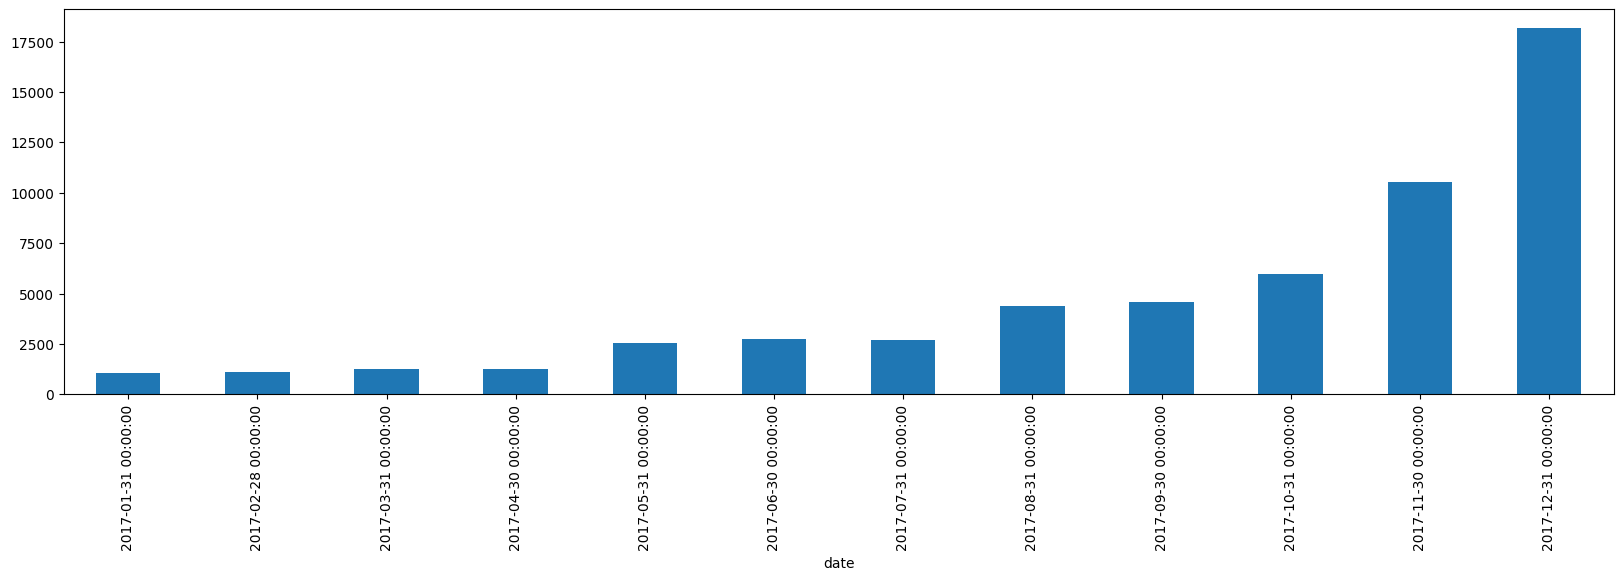

In [357]:
from bokeh.plotting import figure, show

max_monthly_bitcoin_2017.plot(kind='bar', figsize=(20, 5))

# https://docs.bokeh.org/en/latest/docs/user_guide/basic/bars.html#bars
p = figure(width=1200, height=600)
p.vbar(x=max_monthly_bitcoin_2017.index.tolist(), top=max_monthly_bitcoin_2017.tolist(), color="blue")
show(p)

#### Daily max and min per month

In [358]:
monthly_max_bitcoin_2017 = bitcoin_2017['high'].resample('M').max()

maxDaily = []
for col in monthly_max_bitcoin_2017:
    maxDaily.append(max_daily_bitcoin_2017[max_daily_bitcoin_2017 == col])
    
pd.DataFrame(maxDaily).transpose()

,high,high,high,high,high,high,high,high,high,high,high,high
date,,,,,,,,,,,,
2017-01-04,1053.746233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-24,NaN,1127.80216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-10,NaN,NaN,1247.9778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30,NaN,NaN,NaN,1253.524368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-25,NaN,NaN,NaN,NaN,2551.513723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-12,NaN,NaN,NaN,NaN,NaN,2754.79544,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-20,NaN,NaN,NaN,NaN,NaN,NaN,2715.969464,NaN,NaN,NaN,NaN,NaN
2017-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4405.09355,NaN,NaN,NaN,NaN
2017-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4603.558997,NaN,NaN,NaN


In [359]:
monthly_min_bitcoin_2017 = bitcoin_2017['high'].resample('M').min()
min_daily_bitcoin_2017 = bitcoin_2017['high'].resample('D').min()

minDaily = []
for col in monthly_min_bitcoin_2017:
    minDaily.append(min_daily_bitcoin_2017[min_daily_bitcoin_2017 == col])
    
pd.DataFrame(minDaily).transpose()

,high,high,high,high,high,high,high,high,high,high,high,high
date,,,,,,,,,,,,
2017-01-12,695.918643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-09,NaN,876.60734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-25,NaN,NaN,825.18141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,NaN,NaN,NaN,981.770269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,NaN,NaN,NaN,NaN,1239.963009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-15,NaN,NaN,NaN,NaN,NaN,1965.528058,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,1696.316136,NaN,NaN,NaN,NaN,NaN
2017-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2426.632744,NaN,NaN,NaN,NaN
2017-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2757.115754,NaN,NaN,NaN
